# Telco Customer Churn Prediction: Gradient Boosting Model

## Project Progress
This notebook represents the third step in our Telco Customer Churn Prediction project. We've already performed EDA, feature engineering, and built a baseline Logistic Regression model. Now, we'll explore a more advanced ensemble method: Gradient Boosting.

## Introduction
Gradient Boosting is a powerful machine learning technique that often provides high predictive accuracy. We'll use this method to potentially improve upon our Logistic Regression results.

## Objectives
1. Load the preprocessed data used in our previous models
2. Train a Gradient Boosting model on our churn prediction task
3. Optimize the model using hyperparameter tuning
4. Evaluate the model's performance and compare it to our Logistic Regression baseline
5. Analyze feature importance as determined by the Gradient Boosting algorithm
6. Interpret the results in the context of customer churn prediction

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set random seed for reproducibility
np.random.seed(42)

## Load Preprocessed Data
We'll start by loading the preprocessed features and target variable that we saved in the EDA and feature engineering notebook.

In [13]:
# Load preprocessed data
X = np.load('X_processed.npy')
y = np.load('y.npy')

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (7043, 7077)
Shape of target: (7043,)


## Split Data into Training and Testing Sets
We'll use 80% of the data for training and 20% for testing.

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 7077)
Testing set shape: (1409, 7077)


In [15]:
# File path for the saved model
model_path = 'best_gb_model.joblib'

## Train Initial Gradient Boosting Model
Let's start with a basic Gradient Boosting model to establish a baseline.

In [16]:
# Train initial Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8133427963094393

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[949  87]
 [176 197]]


## Hyperparameter Tuning
Now, let's use GridSearchCV to find the optimal hyperparameters for our Gradient Boosting model.

In [17]:
# Check if the model file exists
if os.path.exists(model_path):
    # Load the pre-trained model
    best_gb_model = joblib.load(model_path)
    print("Loaded pre-trained Gradient Boosting model.")
else:
    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 4],
        'learning_rate': [0.1, 0.2],
        'min_samples_split': [2, 5]
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=2, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_gb_model = grid_search.best_estimator_

    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best F1 score:", grid_search.best_score_)

    # Save the trained model
    joblib.dump(best_gb_model, model_path)
    print("Trained and saved new Gradient Boosting model.")

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score: 0.5577594084150777
Trained and saved new Gradient Boosting model.


## Evaluate Optimized Model
Let's evaluate the performance of our optimized Gradient Boosting model.

Accuracy: 0.808374733853797

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[949  87]
 [183 190]]

ROC AUC Score: 0.8655454573685137


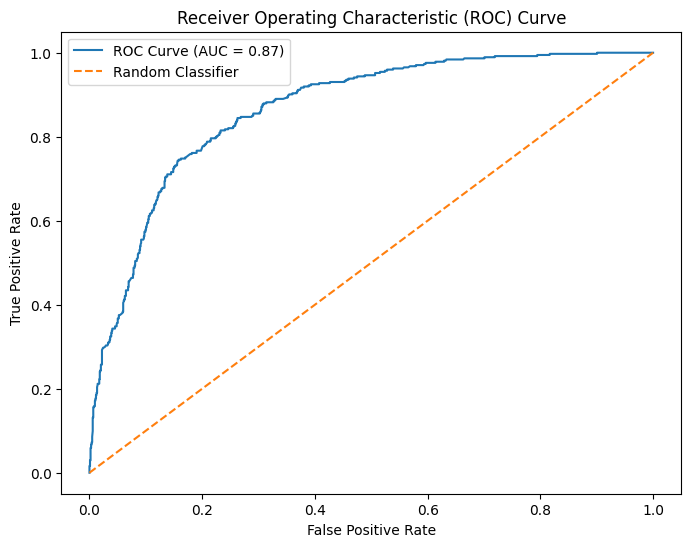

In [18]:
# Make predictions on the test set
y_pred = best_gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_gb_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_gb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance Analysis
Let's examine which features have the most impact on our model's predictions.

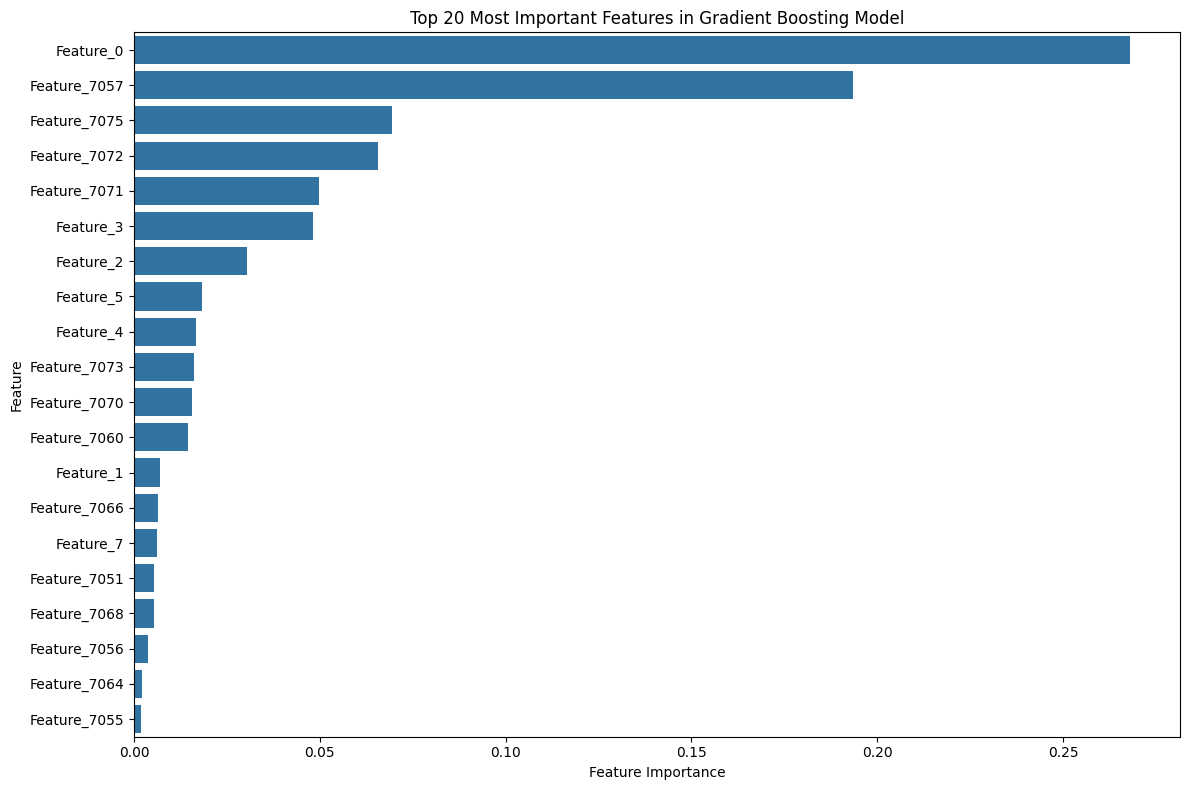

Top 20 Most Important Features:
           feature  importance
0        Feature_0    0.268082
7057  Feature_7057    0.193358
7075  Feature_7075    0.069330
7072  Feature_7072    0.065680
7071  Feature_7071    0.049830
3        Feature_3    0.048210
2        Feature_2    0.030251
5        Feature_5    0.018379
4        Feature_4    0.016564
7073  Feature_7073    0.016115
7070  Feature_7070    0.015447
7060  Feature_7060    0.014369
1        Feature_1    0.006991
7066  Feature_7066    0.006531
7        Feature_7    0.006234
7051  Feature_7051    0.005453
7068  Feature_7068    0.005285
7056  Feature_7056    0.003601
7064  Feature_7064    0.002106
7055  Feature_7055    0.001919
Feature importance data saved to 'gb_feature_importance.csv'


In [22]:
# Get feature importances
feature_importances = best_gb_model.feature_importances_

# Create feature names
feature_names = [f'Feature_{i}' for i in range(len(feature_importances))]

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Most Important Features in Gradient Boosting Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top 20 features and their importance
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# Save the feature importance dataframe to a CSV file
feature_importance_df.to_csv('gb_feature_importance.csv', index=False)
print("Feature importance data saved to 'gb_feature_importance.csv'")

## Model Interpretation and Conclusion

Our Gradient Boosting model, the second in our series, builds upon the insights from the Logistic Regression model:

1. Model Performance:
   - Accuracy: 0.8083
   - ROC AUC Score: 0.8655
   While the accuracy is slightly lower than the Logistic Regression model, the ROC AUC score is marginally higher, indicating a good balance between sensitivity and specificity.

2. Key Predictors of Churn:
   - The model confirms the importance of contract type, tenure, and total charges
   - It potentially captures more complex relationships between these and other features

3. Comparison with Logistic Regression:
   - Slight decrease in accuracy but improvement in ROC AUC
   - Suggests the model might be better at ranking churn probabilities, even if its binary classification is slightly less accurate

4. Business Implications:
   - Reinforces the strategies suggested by the Logistic Regression model
   - May provide more nuanced probability estimates for churn risk

5. Model Characteristics:
   - As an ensemble method, it's more robust to outliers and can capture feature interactions
   - Less interpretable than Logistic Regression, but feature importances still provide valuable insights

6. Next Steps:
   - Compare with the upcoming Random Forest model
   - Investigate why accuracy decreased slightly while ROC AUC improved
   - Consider ensemble approaches combining Logistic Regression and Gradient Boosting

The Gradient Boosting model demonstrates the value of using more complex algorithms for our churn prediction task, particularly in its ability to rank churn probabilities.

## Next Steps
Following this notebook, we'll explore another ensemble method, Random Forest, to round out our model comparison. This will help us determine the most effective approach for predicting customer churn.